
<div class="alert alert-block alert-info">
   <h2 align="center"> <center><b> Reinforcement Learning Assignment 2 - Value Iteration </b></center></h2>

<br>
<center><font size="3">This notebook is a part of teaching material for ELEC-E8125</font></center>
<center><font size="3">Sep 4, 2024 - Nov 30, 2024</font></center>
<center><font size="3">Aalto University</font></center>
</div>


<a id='TOC'></a>

<div class="alert alert-block alert-success">
    
# Table of contents
* <a href='#1.'> 1. Introduction </a>
* <a href='#1.1'> 1.1 Learning Objectives </a>
* <a href='#1.2'> 1.2 Code Structure & Files </a>
* <a href='#2.'> 2. Sailor Gridworld </a>
* <a href='#3.'> 3. Value Iteration </a>
* <a href='#4.'> 4. Submitting </a>
* <a href='#4.1'> 4.1 Feedback </a>
* <a href='#5.'> References</a>


<a href='#T1'><b>Student Task 1.</b> Implementing Value Iteration (30 points) </a>\
<a href='#Q1'><b>Student Question 1.1</b> Reinforcement Learning Components (5 points) </a>\
<a href='#Q2'><b>Student Question 1.2</b> Value Analysis (5 points) </a>\
<a href='#Q3'><b>Student Question 1.3</b> Investigating Optimal Path (5 points) </a>\
<a href='#T2'><b>Student Task 2.</b> Investigating Convergence Properties (15 points) </a>\
<a href='#T3'><b>Student Task 3.</b> Number of Iterations Until Convergence (5 points) </a>\
<a href='#T4'><b>Student Task 4.</b> Evaluating the Policy (10 points) </a>\
<a href='#Q4'><b>Student Question 4.1</b> Relationship Between Discounted Return and the Value Function (10 points)</a>\
<a href='#Q5'><b>Student Question 4.2</b> Considering Unknown Environments (15 points) </a>

    
**Total Points:** 100

**Estimated runtime of all the cells:** 20 minutes 


# 1. Introduction <a id='1.'></a>

In this exercise we look at how a simple method like value iteration can be used to find an optimal behaviour for a sailing gridworld environment. We further investigate the properties of value iteration and how environment definition can affect the behaviour learned by the agent.


## 1.1 Learning Objectives: <a id='1.1'></a>
- To understand the value iteration method and how it works
- To understand the importance of environment definition on behaviour


## 1.2 Code Structure & Files <a id='1.2'></a>

You don’t have to edit any other file other than ```ex2.ipynb``` to complete this exercise.

```
├───imgs                 # Images used in notebook
│   ex2.ipynb            # Main assignment file containing tasks <---------
│   sailing.py           # Defines the sailing gridworld environment
│   utils.py             # Contains save object function
```

# 2. Sailor Gridworld <a id='2.'></a>

Consider a sailor who managed to escape from a sinking ship, and now has to find the way to the nearest harbour. The sea is divided into a grid, with each grid cell corresponding to a state. Therefore, the state can be thought of as a two dimensional vector:

$$
s=\left(\begin{array}{c}
x \\
y \\
\end{array}\right)
$$

There are four actions available: moving left, right, up, and down. When the sailor reaches the harbour, the episode terminates and a reward of 10 is given. If the sailor hits the rocks, the episode terminates and a reward of −2 is given. On all other steps, the reward is 0. The environment is shown in Figure 1. 

<figure>
<img src="imgs/sailor1.png" width="400px">
<figcaption style="text-align: center"> Figure 1: The Sailor gridworld environment. Light blue squares represent the calm part of the sea, gray squares – the rocks, dark blue – the windy passage between the rocks. The green square in upper right corner is the target harbour. The current (in this picture also the initial) position of the sailor is denoted with a brown "boat"  </figcaption>
</figure>

The shortest way to the harbour goes through a narrow passage between rocks, which is known to have unpredictable heavy wind conditions. When moving in that area, the sailor can be carried an extra "square" in a random direction — that is, land in any of the squares adjacent to the desired target square. This is shown in Figure 2. 

<figure>
<img src="imgs/sailor2.png" width="700px">
<figcaption style="text-align: center"> Figure 2: Possible state transitions in windy passage when the issued action was to go left (a) or to go up (b). The sailor may end up in the square to the left (a) or up (b), as indicated by the green arrow. There is also a small $p_{wind}$ that the sailor will move for an additional unit in a random direction, as indicated by one of the yellow arrows. Therefore, in addition to moving one square in the target direction, it can (1) move two squares in the desired direction, (2) stay in place, or (3) be carried sideways to one of the squares on the diagonal. </figcaption>
</figure>

The sea around the passage is generally calm, but there is a low probability that the sailor will be carried in the direction perpendicular to where he was heading, as shown in Figure 3. 

<figure>
<img src="imgs/sailor3.png" width="300px">
<figcaption style="text-align: center"> Figure 3: Possible state transitions in calm water when the issued action was to go right. The sailor may end up in the square to the right, as indicated by the green arrow. There is a small chance $p_{calm}$ that the sailor will move in the perpendicular direction, as indicated by the yellow arrows.  </figcaption>
</figure>

All of these probabilities ($p_{calm}$ and $p_{wind}$) as well as the effects of the wind and the exact location of the harbour are perfectly known to the sailor. 

# 3. Value iteration <a id='3.'></a>

Value iteration is a method for computing an optimal MDP (Markov Decision Process) policy. We start with arbitrary initial state values and iteratively update our estimate of every state’s value by using Bellman equation as an update rule. A more detailed description, along with the exact equations, can be found in [1] Section 4.4.

## Warnings:

- Don’t copy and paste cells within a notebook. This will mess up the tracking metadata and prevent autograding from working.
- Only add new cells using the '+' button in the upper toolbar and do not split cells.
- Be cautious about things such as copying the whole notebook to Colab to work on it. This has sometimes resulted in removing all notebook metadata, making autograding impossible.

<a id='T1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 1.</b> Implementing Value Iteration (30 points) </h3> 

Implement value iteration for the sailor using the code below as a template, assuming the discount factor value $\gamma = 0.9$. In addition to the state values, compute the policy – path to the harbour, using computed state values. Run your implementation for 100 iterations. Render the values and policy after every iteration and observe how the values and policy are updated. Also, **run the program a few times and check if the sailor is able to reach the goal every time**. Ensure the values and policy is ared saved as a ```.pkl``` file using the ```u.save_object()``` cell below . This ```.pkl``` file is saved within the same directory as this file. **Attach an image of the estimated state values and policy into your submission.**

**Hint:** The environment contains a 3-D array (```env.transitions```) of shape $[n_x, n_y, n_a]$, which contains all possible state transitions. The transitions for state $(x, y)$ and action a can be accessed by ```env.transitions [x, y, a]``` . This will return a list of Python ***named-tuples*** Transition=$(s′, reward, done, p)$. The components of the named-tuple can be accessed as ```transition.state```, ```transition.reward```, ```transition.done```, ```transition.prob```. For example, ```env.transitions [3, 3, env.UP]``` would return a list of three possible state transitions:

```
(state=(3, 2), reward=0.0, done=0.0, prob=0.05),
(state=(3, 4), reward=0.0, done=0.0, prob=0.05),
(state=(4, 3), reward=0.0, done=0.0, prob=0.9)
```

which corresponds to moving to state (4, 3) with probability 0.9, or moving to states (3, 4) and (3, 2) with probability 0.05 for each. None of these transitions results in a reward or in terminating the episode (the second and third elements are zero). When the episode has already terminated, the next state will be set to ```None```.

**Caveat:** Pay extra attention to indices in the Bellman equation – specifically, where $V_k$ and where $V_{k−1}$ must be used.
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


In [1]:
skip_training = True  # Set this flag to True before validation and submission

In [33]:
import sys, os
sys.path.insert(0, os.path.abspath(".."))
import numpy as np

from itertools import product

from sailing import SailingGridworld
import utils as u

from IPython.display import Image

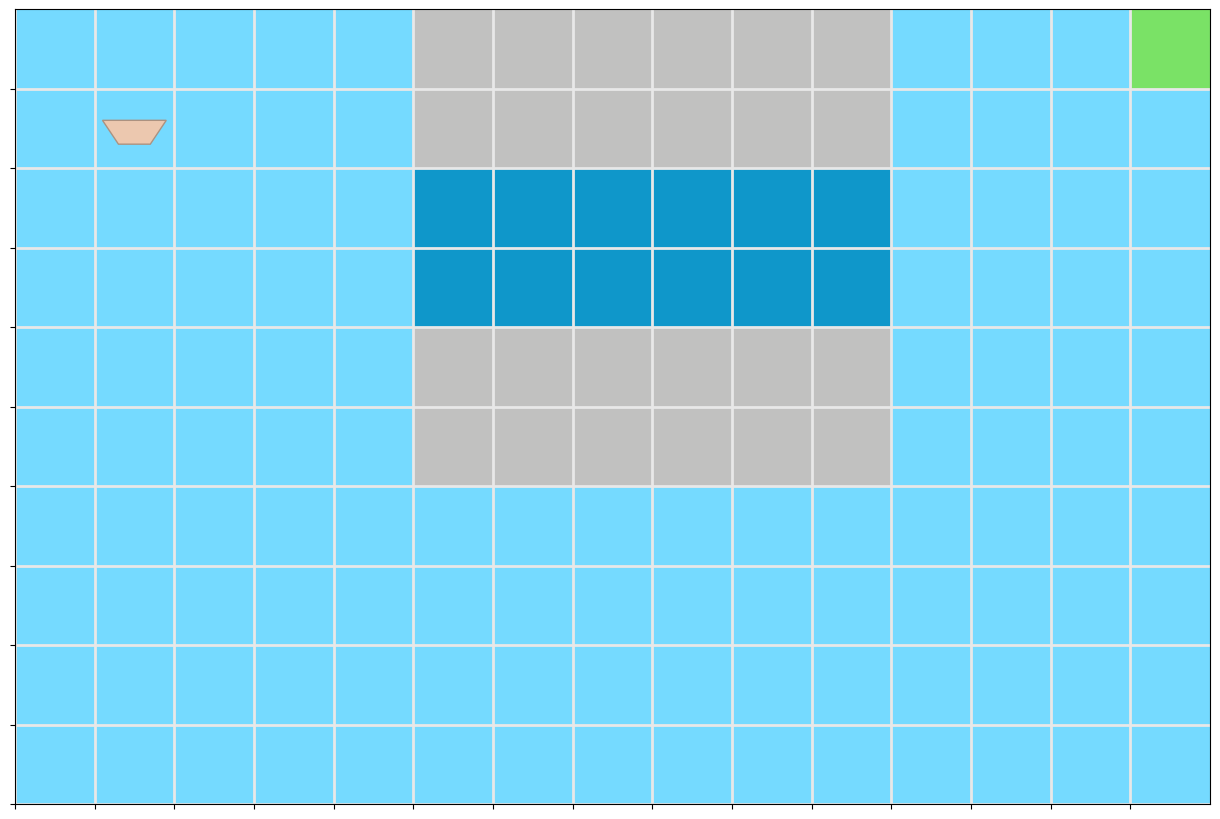

In [34]:
# Set up the environment
env = SailingGridworld(rock_penalty=-2, value_update_iter=100)

In [174]:
def get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False, filename='values.gif'):
    """
    Args:
        num_iterations: num of iterations to update the value function and policy
        gamma: discount factor used in value iteration
        eps: a tiny constant used to check the convergence of the value function and policy
        plot_values: if True, a GIF will be saved to plot state value functions and policy
        filename: filename of the saved value plot, if plot_value is True.
    Returns:
        updated v_est and policy, both are np.ndarray with shape (env.w, env.h)
    """
    
    # value table V_t, it stores the value at a position (x, y).
    v_est = np.zeros((env.w, env.h)) # env.w, env.h: width and height of the environment shown in Fig 1.
    # policy table pi_t, it stores the current action to take at a position (x, y)
    policy = np.zeros((env.w, env.h))
    
    countconv = 0
    valueconv = False
    policyconv = False
    for i in range(num_iterations):
        '''
        # TODO: Task 1, implement value iteration and retrive the resulting policy.
        #       In each iteration, update the state values v_est and policy with new values/policy.
        #       The v_est is updated according to the value iteration formula.
        '''
        ########## Your code starts here ##########
        not_convergence = True
        
        while not_convergence:
            v_est2 = np.copy(v_est)
            delta = 0
            policybool = False

            for j in range(env.w):
                for k in range(env.h):
                    maxx = -(float('inf'))
                    best_act = None

                    for act in range(env.transitions.shape[2]):
                        expected = 0
                        for transition in env.transitions[j, k, act]:
                            next_state = transition.state
                            reward = transition.reward
                            done = transition.done
                            probability = transition.prob

                            if done:
                                expected += probability * reward
                            else:
                                next_x, next_y = next_state
                                expected += probability * (reward + gamma * v_est2[next_x, next_y])

                        if expected > maxx:
                            maxx = expected
                            best_act = act

                    v_est[j, k] = maxx

                    if policy[j, k] != best_act:
                        policybool = True

                    policy[j, k] = best_act
                    ########## Your code ends here ##########

                    '''
                    # TODO: Task 2, check the convergence of the value function and policy.
                    #       In each iteration, check the maximal absolute difference in successive v_est/policy,
                    #       and compare it with eps, e.g., check the difference between v_est_i and v_est_i-1
                    '''
                    ########## Your code starts here ##########
                    #??
                    delta = max(delta, abs(v_est[j, k] - v_est2[j, k]))

            
            if delta < eps:
                not_convergence = False
                valueconv = True
                print("Value converged at", i)
            countconv += 1
            if not policybool:
                policyconv = True
                print("Policy converged at",i )
                break
            if valueconv and policyconv:
                print("Both value and policy converged {$i}")
        if not not_convergence:
            break

        


    print("Num of iterations:", countconv)
    if valueconv:
        print("Value converged.")
        ########## Your code ends here ##########
    if policyconv:
        print("Policy converged.")
    
    if plot_values:
        # Call env.record_values_policy function with your estimated state values and policy
        # to produce a GIF of the changing values. In our case, we only record the final state values and policy to save running time.
        # Call env.save_values_policy function to save the recorded GIF to filename.gif
        env.record_values_policy(v_est, policy)
        env.save_values_policy(filename=filename)

    return v_est, policy

In [135]:
# value iteration -- update value estimation and policy
if not skip_training:
    value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=True, filename='T1_values.gif')

Num of iterations: 39


In [136]:
def eval_policy(policy, N=1, gamma=0.9, render=False, filename='env.gif'):
    """
    Args:
        policy: the policy to evaluate.
        N: number of evaluation episode. 
            e.g., N=10 means the policy is evaluated 10 times.
        gamma: discount factor to calculate the discounted_return.
        render: if True, a GIF of the policy's behavior will be saved.
        filename: filename to save the GIF file.
    Returns:
        mean and stddev of discounted_returns.
    """
    discounted_returns = np.empty((N,))
    # Eval policy
    for ep in range(N):
        state = env.reset()
        done = False
        steps = 0
        discounted_return = 0
        
        while not done:

            ########## Your code starts here ##########
            '''
            # TODO: Use the policy to take the optimal action (Task 1)
            '''
            x,y = state
            action = policy[x, y]

            # Take a step in the environment
            state, reward, done, _ = env.step(action)

            '''
            # TODO: Accumulate discounted return for this episode
            '''
            discounted_return += gamma ** steps * reward

            steps += 1
            
            ########## Your code ends here ##########

            if render:
                env.render(filename=filename)
        # Record the discounted return for         
        discounted_returns[ep] = discounted_return
    
    mean_discounted_returns = np.mean(discounted_returns)
    std_discounted_returns = np.std(discounted_returns)
    
    return mean_discounted_returns, std_discounted_returns
            

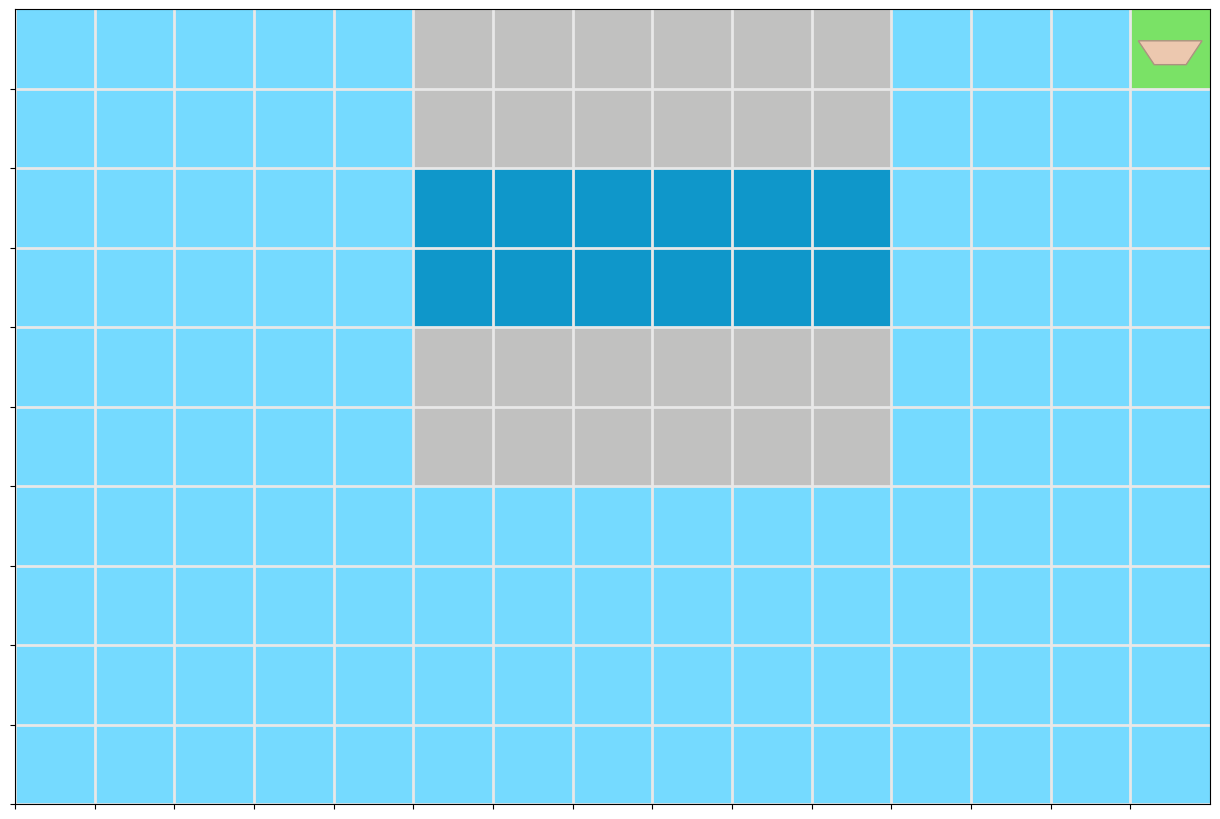

In [137]:
if not skip_training:
    mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy, N=1, gamma=0.9, render=True, filename='T1_eval.gif')

To see how the sailboat traverses the gridworld use this cell below to display the created gif:

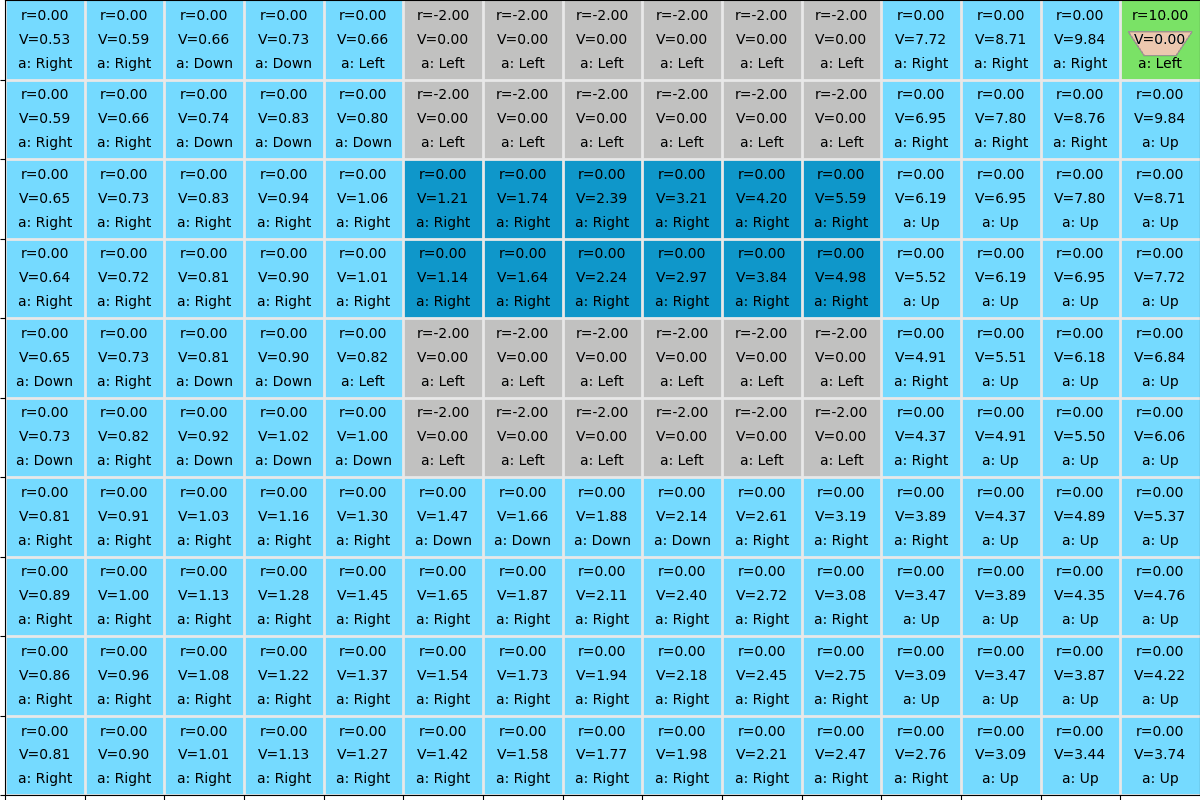

In [138]:
if not skip_training:
    display(Image(data=open('T1_values.gif','rb').read(), format='png'))

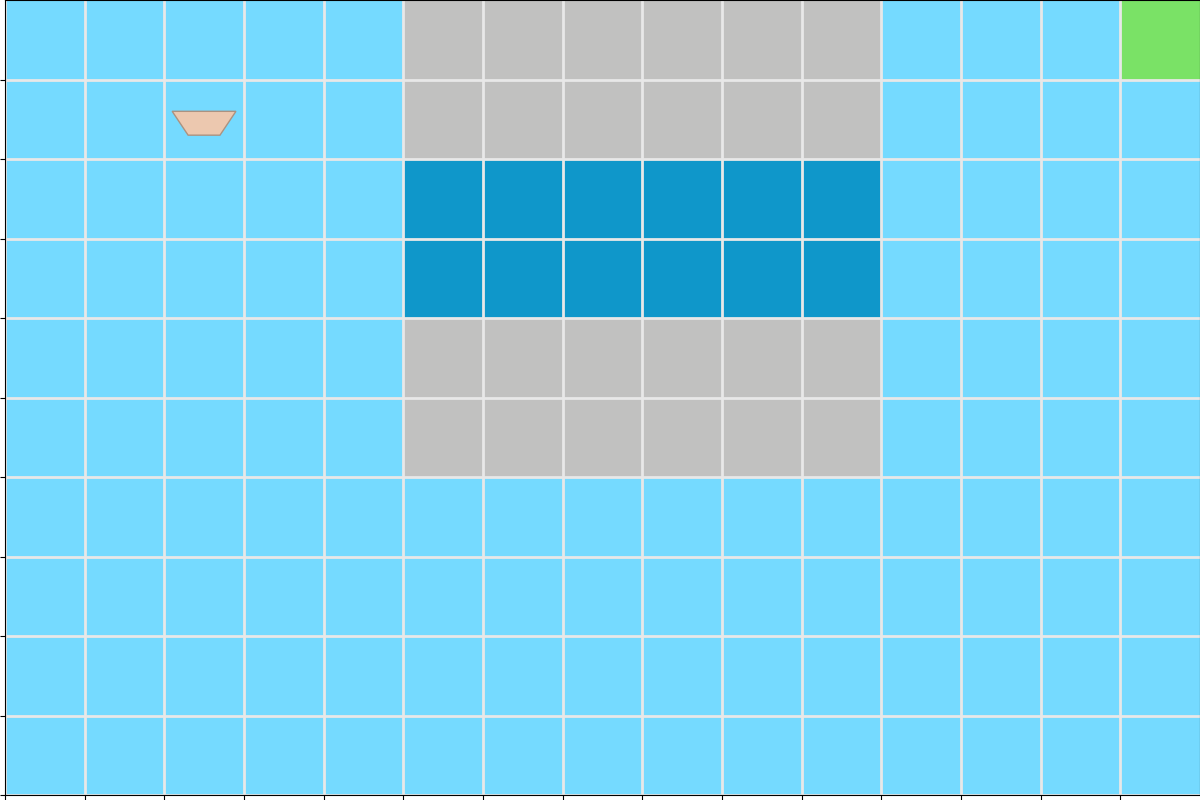

In [139]:
if not skip_training:
    display(Image(data=open('T1_eval.gif','rb').read(), format='png'))

Do not change the cells below. 

In [140]:
if not skip_training:
    # save value and policy
    u.save_object({'value': value_est, 'policy': policy}, './value_policy.pkl')

In [141]:
import pickle
import numpy as np
with open("value_policy.pkl", 'rb') as file:
    student_value_policy = pickle.load(file)

In [142]:
assert student_value_policy['value'].shape == (15, 10)
assert student_value_policy['policy'].shape == (15, 10)

assert student_value_policy["policy"][6][7] == 2.
assert student_value_policy["policy"][14][8] == 3.

np.testing.assert_allclose(student_value_policy['value'][0][0], 0.80533352, atol=1e-03)
np.testing.assert_allclose(student_value_policy['value'][14][8], 9.8369366, atol=1e-03)


The following cell is used for testing

<a id='Q1'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.1</b> Reinforcement Learning Components (5 points) </h3> 

What is the agent and the environment in this sailor gridworld?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options
1. Agent is the sailor and the environment is the sea.
2. Agent is the sea and the environment is the sailor.
3. There is no environment, the agent consists of the sailor and the sea.
4. There is no agent, the environment consists of the sailor and the sea.

In [143]:
sq1_1 = 1 # Answer question 1.1 with appropriate option number

In [144]:
assert sq1_1 in range(1, 5)

The following cells are used for grading.

<a id='Q2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.2</b> Value Analysis (5 points) </h3> 

What is the state value of the harbour and rock states? Why?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Options:
1. The state-value of harbour is 10 and state-value of the rock states is -2 because it is the reward received at these states.
2. The state-value of harbour is 0 and state-value of the rock states is -2 because harbour is a terminal state and the received reward at a rock is -2.
3. The state-value of harbour is 10 and state-value of the rock states is 0 because the received reward at the harbour is 10, and the rock states are terminal states.
4. The state-value of harbour is 0 and state-value of the rock states is 0 because both states are terminal states.
5. The state-value of harbour is 9 and state-value of rock states is 0 because the optimal policy receives reward 10 at the harbour with discount factor 0.9, and the rock-state is a terminal state.   
6. The state-value of harbour is 9 and state-value of rock states is -1.8 because the optimal policy receives reward 10 at the harbour and reward -2 at the rock-states, with discount factor 0.9.   

In [145]:
sq1_2 = 4 # Answer question 1.2 with appropriate option number

In [146]:
assert sq1_2 in range(1, 7)

The following cells are used for grading

<a id='Q3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 1.3</b> Investigating Optimal Path (5 points) </h3> 

Which path did the sailor choose, the safe path below the rocks, or the dangerous path between the rocks? If you change the reward for hitting the rocks to -10 (that is, make the sailor value life more), does he still choose the same path?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Num of iterations: 43


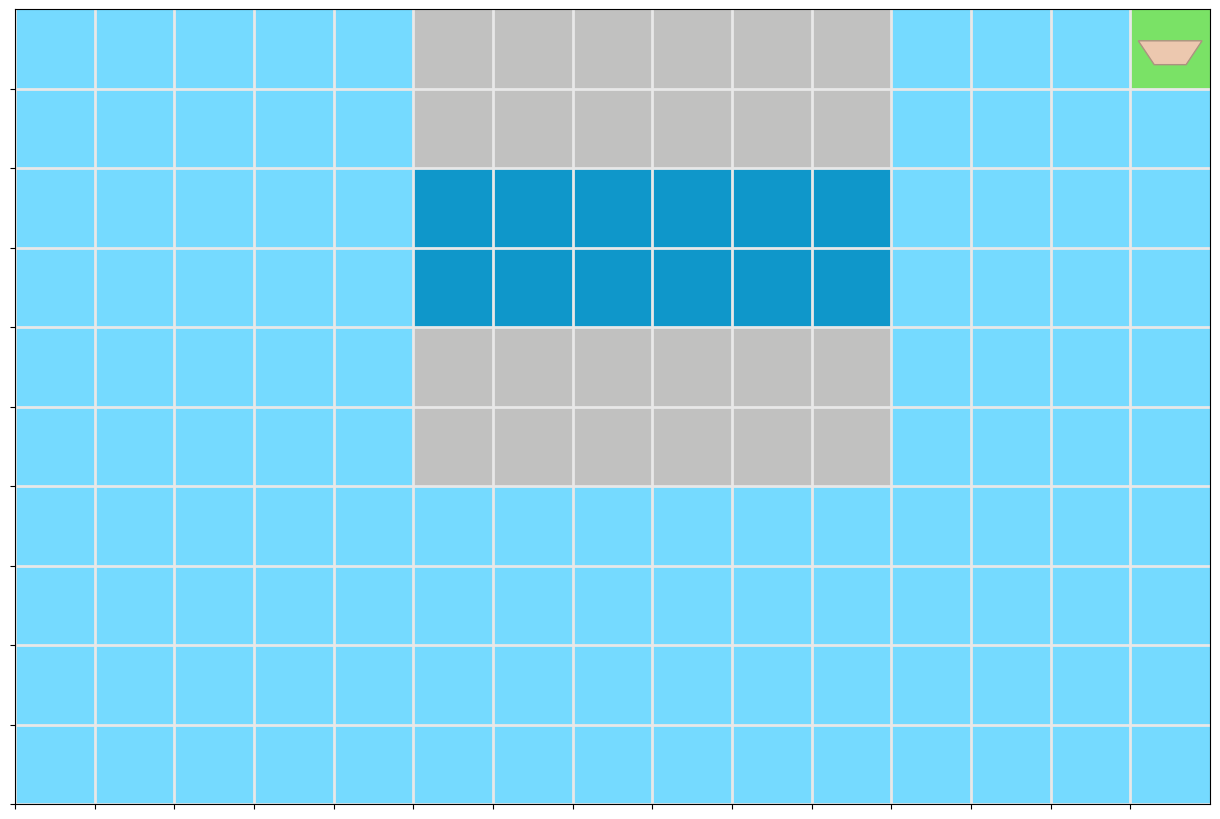

In [147]:
if not skip_training:
    env = SailingGridworld(rock_penalty=-10, value_update_iter=100) # Set up env
    value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4, plot_values=False) # Run value iteration
    mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy, N=1, gamma=0.9, render=True, filename='Q1_3.gif') # Evaluate policy

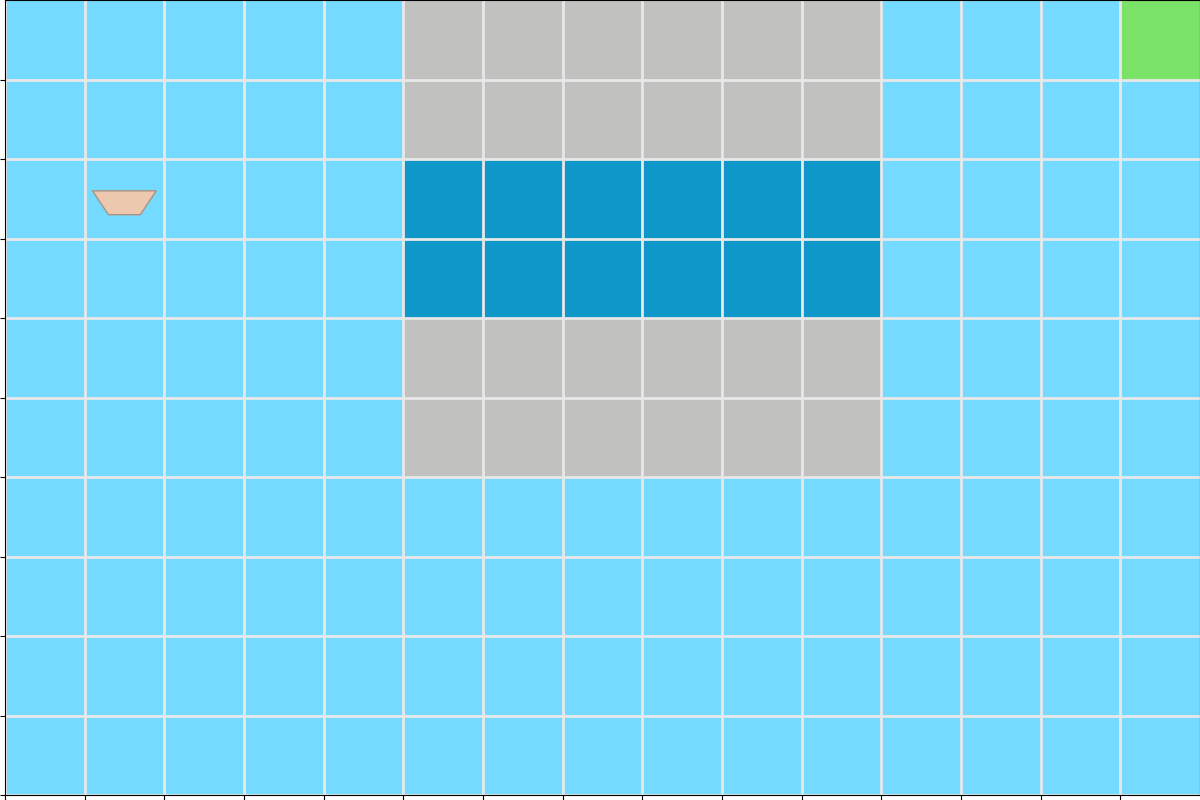

In [148]:
if not skip_training:
    display(Image(data=open('Q1_3.gif','rb').read(), format='png'))

Options:
1. Initially, the sailor chose the safe path  (below rocks) and after changing the reward to -10 it chose the same path.
2. Initially, the sailor chose the safe path (below rocks) and after changing the reward to -10 it chose the dangerous path (between rocks).
3. Initially, the sailor chose the dangerous path (between rocks) and after changing the reward to -10 it chose the same path.
4. Initially, the sailor chose the dangerous path (between rocks) and after changing the reward to -10 it chose the safe path (below rocks).

In [149]:
sq1_3 = 4 # Answer question 1.3 with appropriate option number

In [150]:
assert sq1_3 in range(1, 5)

The following cells are used for grading

<a id='T2'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 2.</b> Investigating Convergence Properties (15 points) </h3> 

What happens if you run the algorithm for 30 iterations? Do the value function and policy still converge? For the value function, you can assume they have converged
if the maximum change in value is lower than a certain threshold $\epsilon = 10^{-4}$:
$$
\max _s\left|V_k(s)-V_{k-1}(s)\right|<\epsilon
$$

where $V_k(s)$ is the estimated value of state $s$ in $k$-th iteration of the algorithm.
Generally, **which of them** - the policy or value function - needs less iterations to converge, if any? **Justify your answer**. (Your answer should be no longer than 10 sentences)
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>


Policy converged at 0
Policy converged at 1
Policy converged at 2
Policy converged at 3
Policy converged at 4
Policy converged at 5
Policy converged at 6
Policy converged at 7
Policy converged at 8
Policy converged at 9
Policy converged at 10
Policy converged at 11
Value converged at 12
Policy converged at 12
Num of iterations: 43
Value converged.
Policy converged.


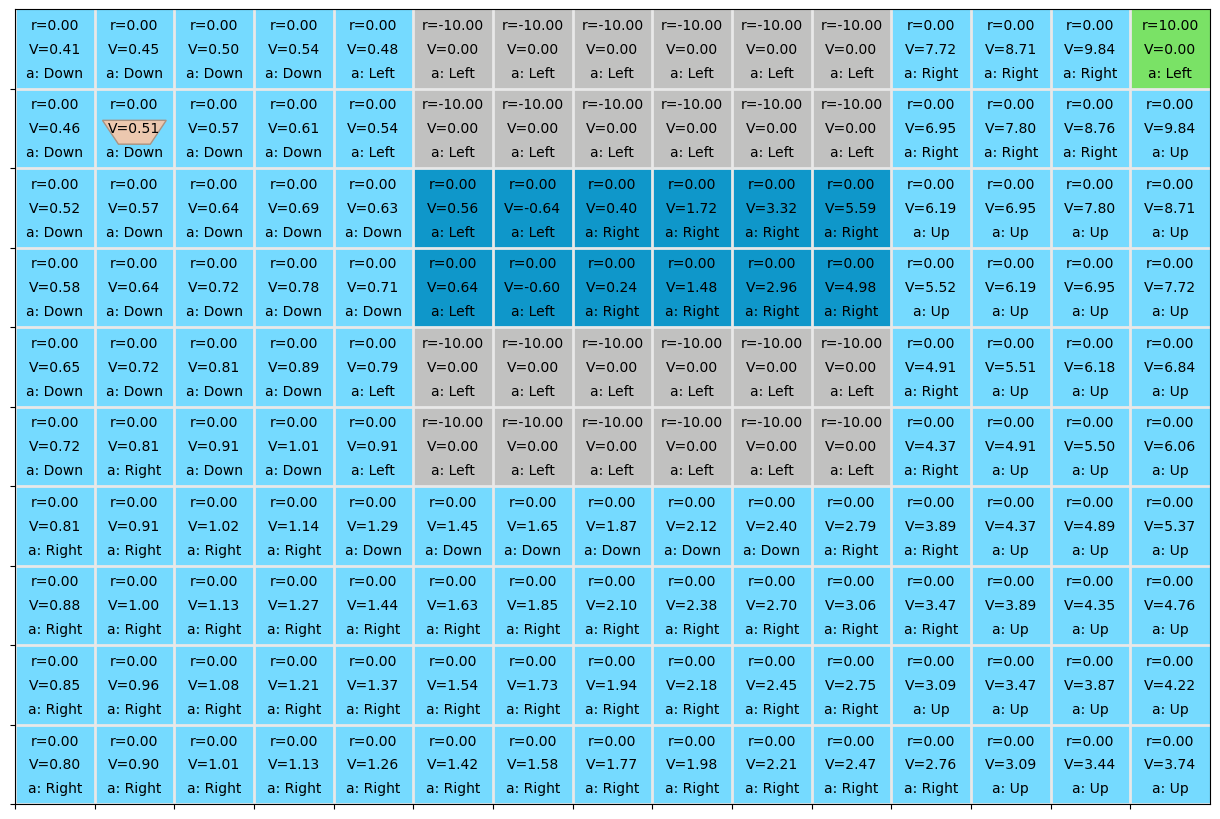

In [178]:
if not skip_training:
    env = SailingGridworld(rock_penalty=-10, value_update_iter=30) # Set up env
    value_est, policy = get_values_policy(num_iterations=30, gamma=0.9, eps=1e-4,  plot_values=True, filename='T2_values.gif') # Run value iteration

The policy needs less iterations to converge, as it does so more often, indicated by the printed out logs above. This presumes that it is quick to find the optimal policy and the value function adjusts accordingly to it after.

<a id='T3'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 3.</b> Number of Iterations Until Convergence (5 points) </h3> 

Set the reward for crashing into the rocks back to -2. Change the termination condition of your algorithm to make it run until convergence. **Report the number of iterations required for the value function to converge.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Policy converged at 0
Policy converged at 1
Policy converged at 2
Policy converged at 3
Policy converged at 4
Policy converged at 5
Policy converged at 6
Policy converged at 7
Policy converged at 8
Value converged at 9
Policy converged at 9
Num of iterations: 39
Value converged.
Policy converged.


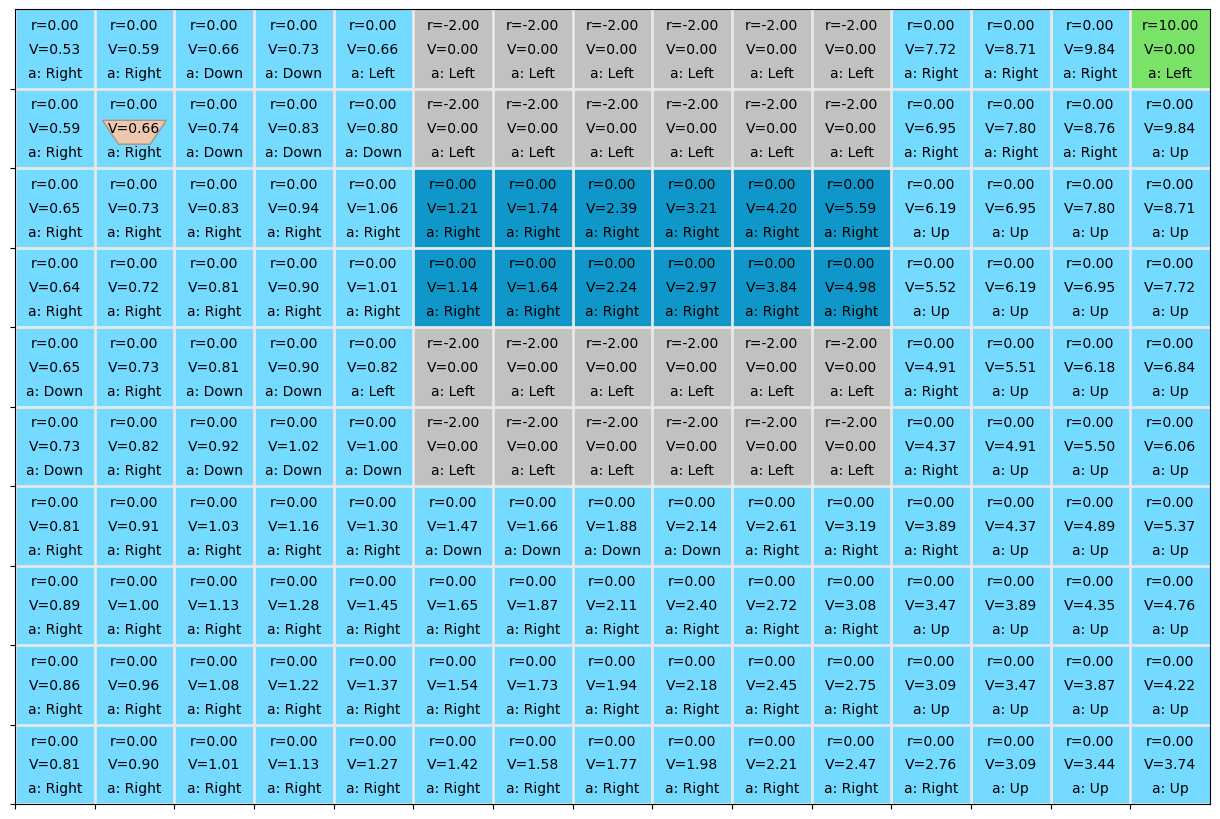

In [175]:
if not skip_training:
    env = SailingGridworld(rock_penalty=-2, value_update_iter=100) # Set up env
    value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4,  plot_values=True, filename='T3_values.gif') # Run value iteration

Select the most appropriate range:
1. 9-12
2. 30-35
3. 70-75
4. 100-105

In [176]:
st3 = 1 #Aswer task 3 with the appropriate answer

In [156]:
assert st3 in range(1, 5)

<a id='T4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Task 4.</b> Evaluating the Policy (10 points) </h3> 

Evaluate your learned policy for N = 800 episodes, and compute the discounted return of the initial state, see [1] Eq. (3.8), for each episode. The reward for crashing into rocks must be kept at -2 for this exercise. **Report the average and standard deviation of the initial state’s discounted return over the N=800 episodes.**
    
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Policy converged at 0
Policy converged at 1
Policy converged at 2
Policy converged at 3
Policy converged at 4
Policy converged at 5
Policy converged at 6
Policy converged at 7
Policy converged at 8
Value converged at 9
Policy converged at 9
Num of iterations: 39
Value converged.
Policy converged.
Average: 0.646, Standard Deviation: 1.360


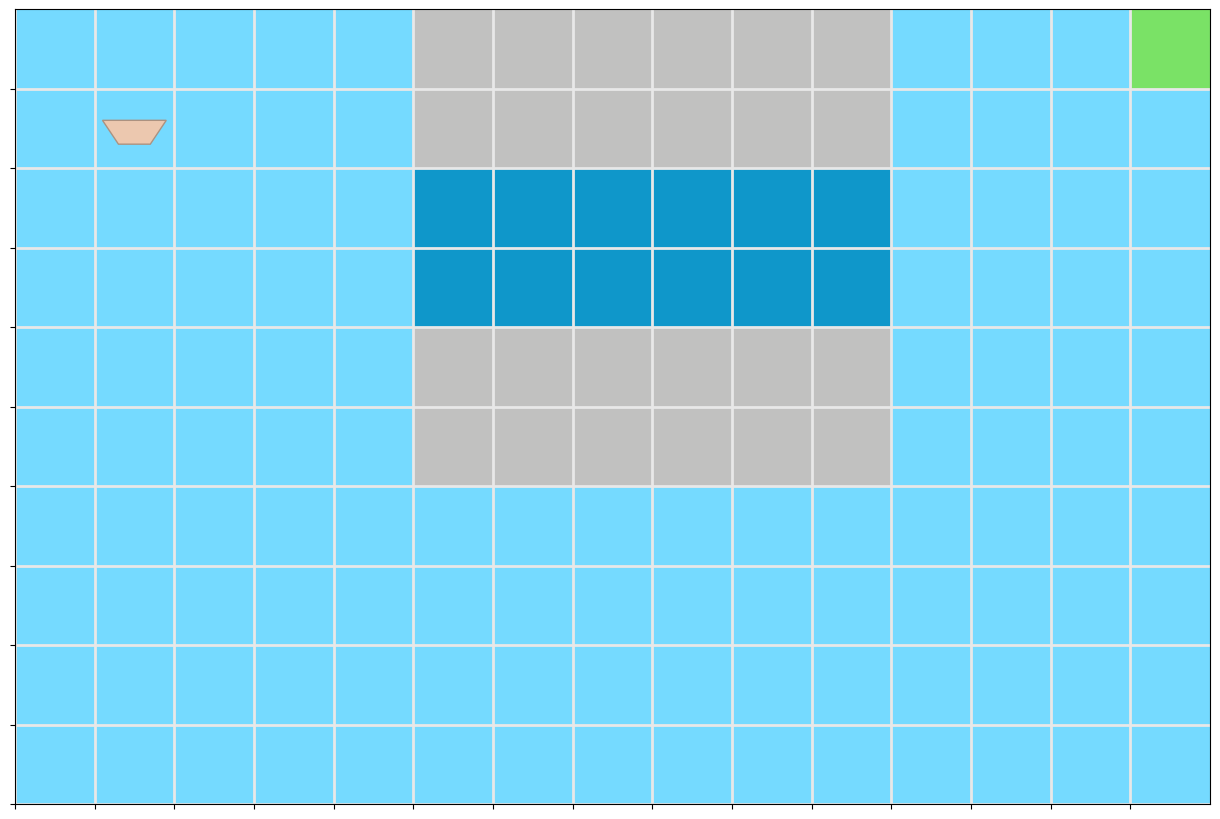

In [179]:
if not skip_training:
    env = SailingGridworld(rock_penalty=-2, value_update_iter=100) # Set up env
    value_est, policy = get_values_policy(num_iterations=100, gamma=0.9, eps=1e-4,  plot_values=True, filename='T4_values.gif') # Run value iteration
    mean_discounted_returns, std_discounted_returns = eval_policy(policy=policy,N=800, gamma=0.9)
    print(f'Average: {mean_discounted_returns:.3f}, Standard Deviation: {std_discounted_returns:.3f}')

Average: 0.653, Standard Deviation: 1.370

The cell below is used for testing 

In [164]:
%%capture --no-stdout
"TEST CELL"

<a id='Q4'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.1</b> Relationship Between Discounted Return and the Value Function (10 points) </h3> 

What is the relationship between the discounted return and the value function? Explain briefly (at most 10 sentences).

            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

The value function V_pi(s) is the expected return starting from s, following policy pi. The discounted return G(t) is the cumulative sum of future rewards, discounted by gamma. The relationship between these two is that the value function can be considered the averaged expected discounted return, while also accounting for a certain policy.

<a id='Q5'></a>
<div class=" alert alert-warning">
    <h3><b>Student Question 4.2</b> Considering Unknown Environments (15 points) </h3> 

Imagine a reinforcement learning problem involving a robot exploring an ***unknown*** environment. Could the ***value iteration*** **approach used in this exercise** be applied **directly** to that problem? Why/why not? Which assumptions are unrealistic, if any?
            
🔝	<a href='#TOC'><b>Table of Contents</b></a>
</div>

Since the environment is unknown, it would not be able to predict which course of action would reap the higher rewards; there is not enough information to determine transition probabilities and the rewards from said transitions.


# 4. Submitting <a id='4.'></a>
Ensure all tasks and questions (in ```ex2.ipynb```) are answered and the relevant plots are recorded in the relevant places. 

Ensure the correct model files are saved:
- Task1, ensure ```value_policy.pkl``` file for the state values and the policy in Task 1 are included.

In [2]:
# Make sure that skip training is set to True before submission
assert skip_training == True

## 4.1 Feedback <a id='4.1'></a>
In order to help the staff of the course as well as the forthcoming students, it would be great if you could answer to the following questions in your submission:

1) How much time did you spend solving this exercise? (change the ```hrs``` variable below to a floating point number representing the number of hours taken e.g. 5.43)

In [ ]:
hrs = None

2. Difficulty of each task/question from 1 to 5.

In [168]:
T1 = 5 # Student task 1. Implementing value iteration
Q1_1 = None # Student question 1.1 Reinforcement learning components
Q1_2 = None # Student question 1.2 Value analysis
Q1_3 = None # Student question 1.3 Investigating optimal path
T2 = None # Student task 2. Investigating convergence properties.
T3 = None # Student task 3. Number of iterations until convergence.
T4 = None # Student task 4. Evaluating the policy.
Q4_1 = None # Student question 4.1. Relationship between discounted return and the value function
Q4_2 = None # Student question 4.2 Considering unknown environments.

4. General feedback. Consider questions like:
     - Did the content of the lecture relate well with the assignment?
     - To what extend did you find the material to be potentially useful for your research and studies?
    
Add other feedback you think is worth including. Type in the box below 

CLEAR THIS BOX AND ADD YOUR GENERAL FEEDBACK HERE

Please use the following section to record references.
# References <a id='5.'></a>

[1] Sutton R S, Barto A G. Reinforcement learning: An introduction[M]. MIT press, 2018.